In [188]:
import os, glob, shutil
import urllib.request as r

def data_yuklab_olish(saqlash_uchun_papka, data_nomi = "salaries"): 
    
    data_nomlari = ["salaries", "exams", "college", "cars", "mall"]
    assert data_nomi in data_nomlari, f"Mavjud bo'lgan dataset {data_nomlari} dan birini kiriting!"
    
    if data_nomi == "college": url = "https://drive.google.com/file/d/1vwfMpQ4ikAI91zn1bWxP_Iqz7DTFUA9F/view?usp=sharing"
    elif data_nomi == "salaries": url = "https://drive.google.com/file/d/1p-XtX29fgXT9CzBfpHm3t8r028gQPRhe/view?usp=sharing"
    elif data_nomi == "exams": url = "https://drive.google.com/file/d/1TYN_sRmauaDgNYgQ-0VSHVAJvLoxKx2R/view?usp=sharing"
    elif data_nomi == "cars": url = "https://drive.google.com/file/d/1Fi5IPdfEktnKyf3dyHmnh84a2jiXl33A/view?usp=sharing"
    elif data_nomi == "mall": url = "https://drive.google.com/file/d/1eGWJVRNmGjfaH0o3dczBbNe_-RrW0_Jm/view?usp=sharing"
    
    full_path = f"{saqlash_uchun_papka}/{data_nomi}.zip"
    os.makedirs(saqlash_uchun_papka, exist_ok = True)

    # Download from the checkpoint path
    if os.path.isfile(f"{saqlash_uchun_papka}/{data_nomi}.csv"): print("Data yuklab olingan"); pass

    # If the checkpoint does not exist
    else: 
        print("Datani yuklash boshlanmoqda...")

        # Get file id
        file_id = url.split("/")[-2]

        # Initialize prefix to download
        prefix = "https://drive.google.com/uc?/export=download&id="

        # Download the checkpoint
        r.urlretrieve(f"{prefix + file_id}", f"{full_path}")
        shutil.unpack_archive(f"{full_path}", f"{saqlash_uchun_papka}")
        os.remove(full_path)

        files = sorted(glob.glob(f"{saqlash_uchun_papka}/*"), key = os.path.getctime)
        fname = os.path.basename(files[-1])
        os.rename(f"{saqlash_uchun_papka}/{fname}", f"{saqlash_uchun_papka}/{data_nomi}.csv")
        print(f"Data {saqlash_uchun_papka} papkasiga {data_nomi} nomi bilan yuklab olindi.")
        
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "exams")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "college")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "salaries")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "cars")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "mall")

Data yuklab olingan
Data yuklab olingan
Data yuklab olingan
Data yuklab olingan
Data yuklab olingan


In [189]:
import pandas as pd
data = pd.read_csv("data/exams.csv")
data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [190]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [191]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [193]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


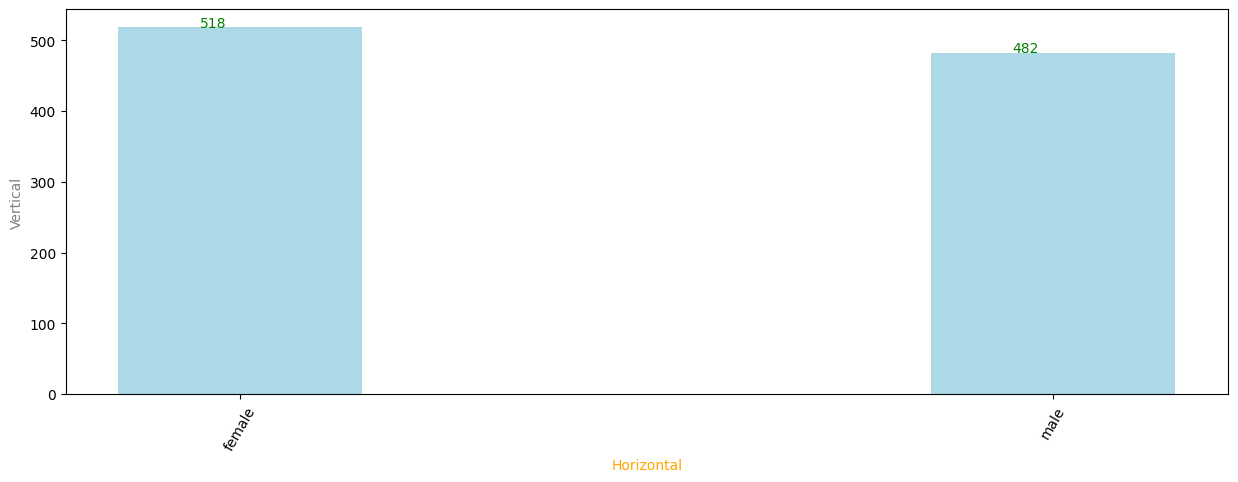

In [194]:
from matplotlib import pyplot as plt
import numpy as np

def data_analysis(df, column_name, color,text_height = 0.02, text_width = 0.05):
    counts = df[column_name].value_counts().values 
    cls_names = df[column_name].value_counts().keys()
    width, text_width, text_height = 0.3, text_width , 0.8
    fig, ax = plt.subplots(figsize = (15,5))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width, color = color)
    ax.set_xlabel("Horizontal", color = "orange")
    ax.set_xticklabels(cls_names, rotation = 60)
    ax.set(xticks = indices, xticklabels = cls_names)
    ax.set_ylabel('Vertical', color = 'grey')

    for i, v in enumerate(counts):  ax.text(i - text_width, v + text_height, str(v), color = "green")

data_analysis(df = data, column_name = "gender", color = "lightblue", text_width = 0.05)



C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


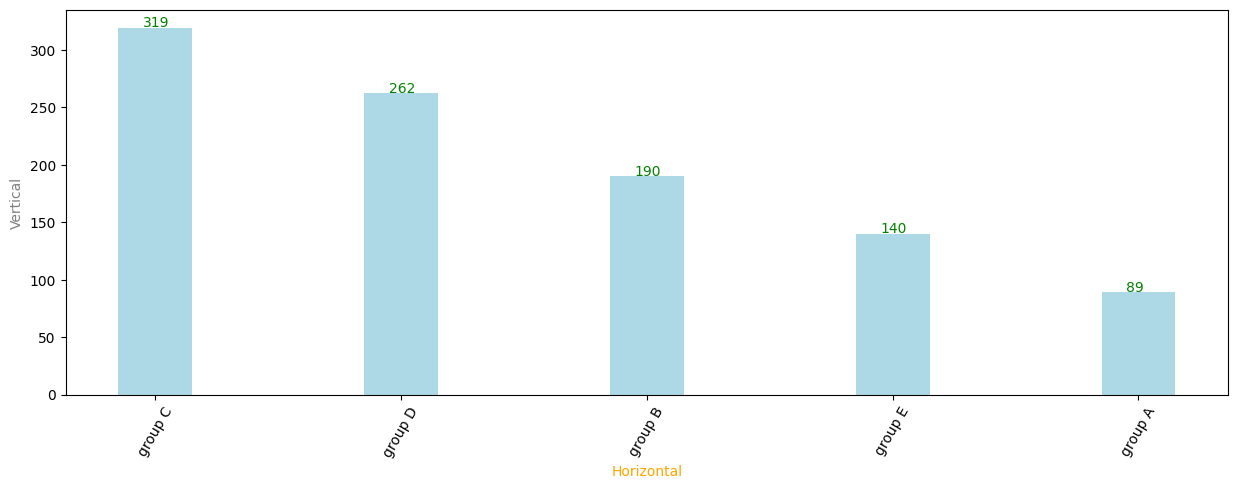

In [196]:
data_analysis(df = data, column_name = "race/ethnicity", color = "lightblue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


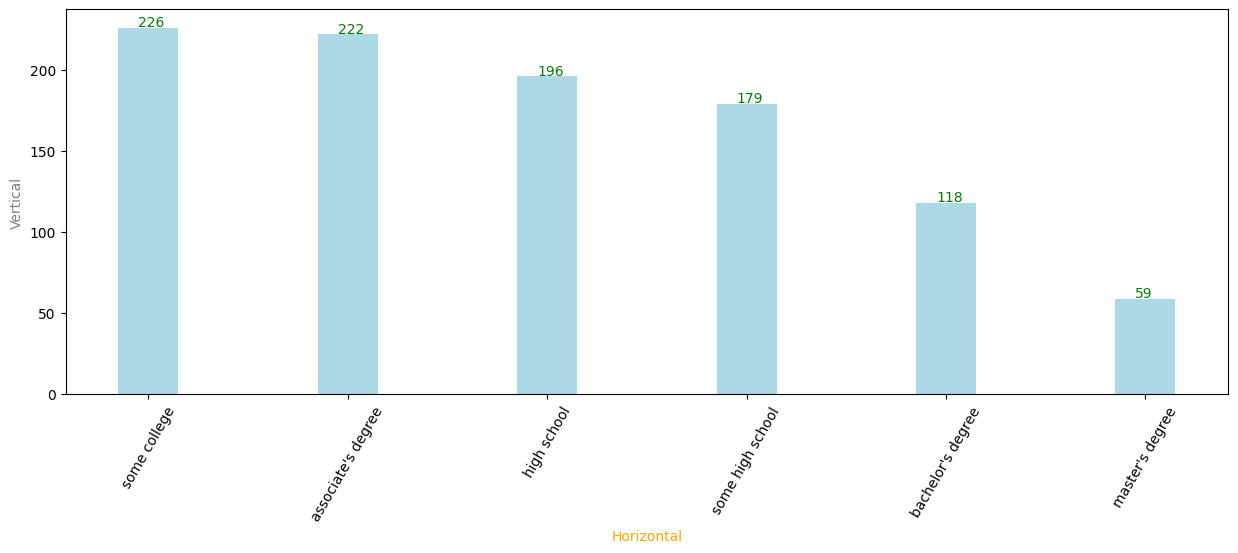

In [197]:
data_analysis(df = data, column_name = "parental level of education", color = "lightblue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


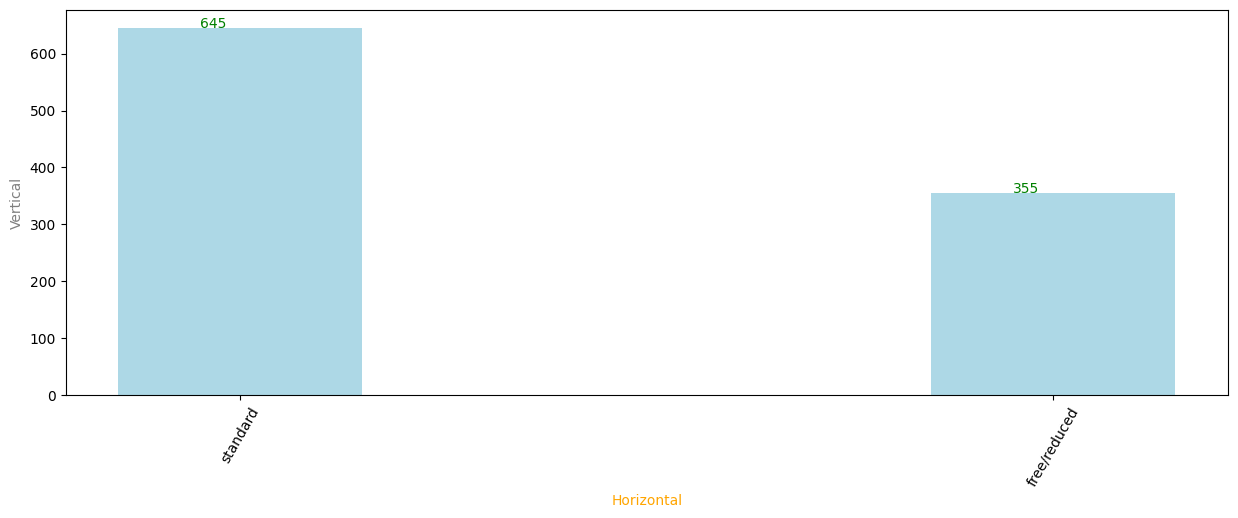

In [198]:
data_analysis(df = data, column_name = "lunch", color = "lightblue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


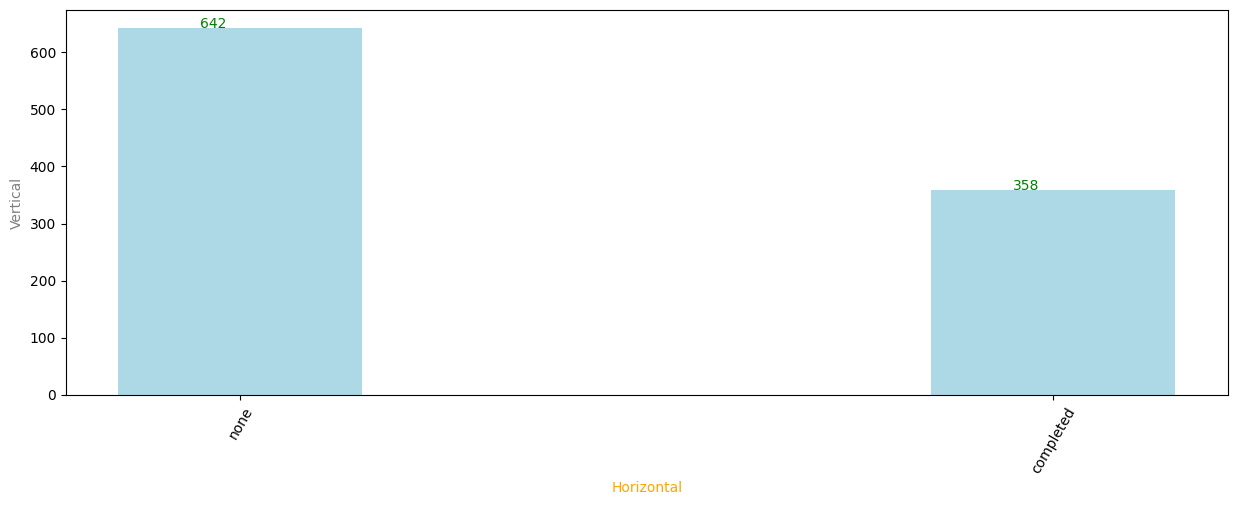

In [199]:
data_analysis(df = data, column_name = "test preparation course", color = "lightblue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


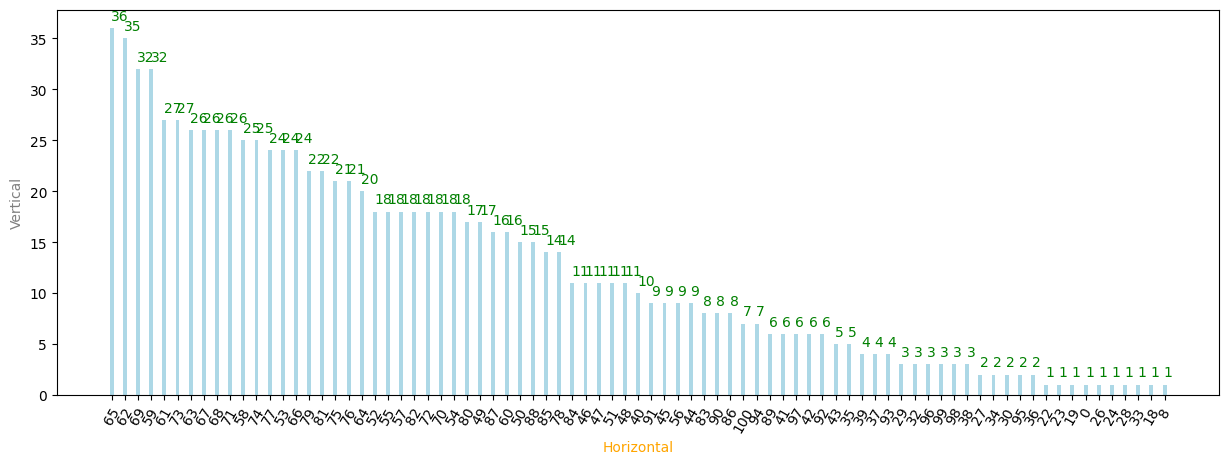

In [200]:
data_analysis(df = data, column_name = "math score", color = "lightblue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


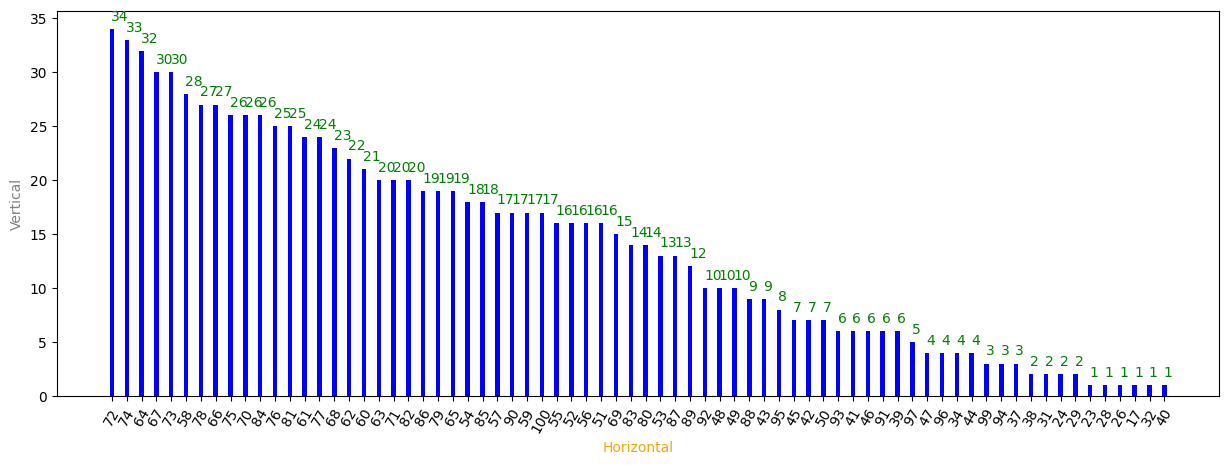

In [201]:
data_analysis(df = data, column_name = "reading score", color = "blue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14580\4155333045.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 60)


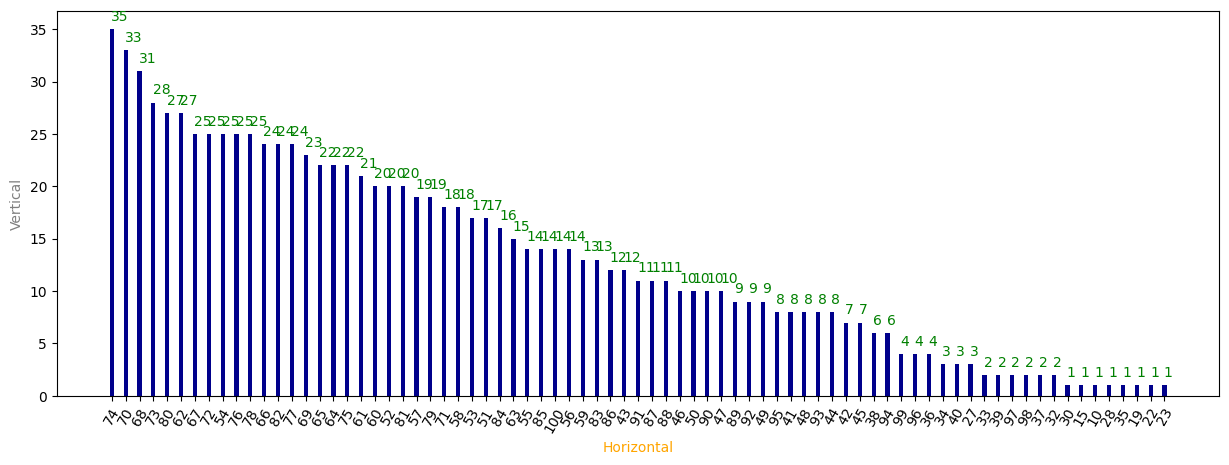

In [202]:
data_analysis(df = data, column_name = "writing score", color = "darkblue", text_width = 0.05)

In [82]:
#1
# features = ["gender","race/ethnicity","parental level of education","lunch", "test preparation course","math score", "reading score"]
# label = ["writing score"]
# x,y = data[features], data[label]
# x.head(100)

In [85]:
#y.head(10)

In [86]:
# from sklearn.model_selection import train_test_split 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# print(len(x_train))
# print(len(x_test))


In [139]:
# son_features = ["math score", "reading score"]
# str_features = ["gender","race/ethnicity","parental level of education","lunch", "test preparation course"]

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# son_converter = Pipeline(steps = [("scaler", StandardScaler())])

# str_converter = Pipeline(steps = [("onehot",OneHotEncoder())])

# str_converter
# son_converter


In [88]:
# data = y_train["writing score"]
# before = data 
# print(f"Before {before[:10]}")
# after = son_converter.fit_transform(np.array(data).reshape(-1, 1))
# print(f"After {after[:10]}")

In [89]:
# #a)#Trainset - 80%, validation set - 10%, test set - 10%

# from sklearn.model_selection import train_test_split

# x_rest, x_train, y_rest, y_train = train_test_split(x, y, test_size = 0.8)

# x_validation, x_test, y_validation, y_test = train_test_split(x_rest, y_rest, test_size = 0.5)

# print("Train set:" , len(x_train))
# print("Validation set:", len(x_validation))
# print("Test set:", len(x_test))

In [175]:
#2
# features = ["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","writing score"]

# label = ["reading score"]
# x,y = data[features], data[label]
# x.head(10)


In [203]:
y.head(12)

,math score
0,72
1,69
2,90
3,47
4,76
5,71
6,88
7,40
8,64
9,38


In [142]:

# son_features = ["math score", "writing score"]
# str_features = ["gender","race/ethnicity","parental level of education","lunch", "test preparation course"]

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# son_converter = Pipeline(steps = [("scaler", StandardScaler())])

# str_converter = Pipeline(steps = [("onehot", OneHotEncoder())])

# str_converter
# son_converter

Pipeline(steps=[('scaler', StandardScaler())])

In [146]:
# data = y_train["reading score"]
# before = data 
# print(f"Before {before[:10]}")
# after = son_converter.fit_transform(np.array(data).reshape(-1, 1))
# print(f"After {after[:10]}")

Before 347    94
213    51
326    61
779    85
341    73
625    97
491    64
334    93
763    62
181    64
Name: reading score, dtype: int64
After [[ 1.71147923]
 [-1.23108802]
 [-0.54677005]
 [ 1.09559306]
 [ 0.2744115 ]
 [ 1.91677461]
 [-0.34147466]
 [ 1.64304743]
 [-0.47833826]
 [-0.34147466]]


In [144]:
# #a)#Trainset - 80%, validation set - 10%, test set - 10%

# from sklearn.model_selection import train_test_split

# x_rest, x_train, y_rest, y_train = train_test_split(x, y, test_size = 0.8)

# x_validation, x_test, y_validation, y_test = train_test_split(x_rest, y_rest, test_size = 0.5)

# print("Train set:" , len(x_train))
# print("Validation set:", len(x_validation))
# print("Test set:", len(x_test))

Train set: 800
Validation set: 100
Test set: 100


In [145]:
# print(y_train.columns)

Index(['reading score'], dtype='object')


In [204]:
#3
features = ["gender","race/ethnicity","parental level of education","lunch","test preparation course","reading score","writing score"]

label = ["math score"]
x,y = data[features], data[label]
x.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
5,female,group B,associate's degree,standard,none,83,78
6,female,group B,some college,standard,completed,95,92
7,male,group B,some college,free/reduced,none,43,39
8,male,group D,high school,free/reduced,completed,64,67
9,female,group B,high school,free/reduced,none,60,50


In [205]:
print(data.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [206]:
son_features = ['reading score', "writing score"]
str_features = ["gender","race/ethnicity","parental level of education","lunch", "test preparation course"]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

son_converter = Pipeline(steps = [("scaler", StandardScaler())])

str_converter = Pipeline(steps = [("onehot", OneHotEncoder())])

str_converter
son_converter

Pipeline(steps=[('scaler', StandardScaler())])

In [212]:
data = y_train["math score"]
before = data 
print(f"Before {before[:10]}")
after = son_converter.fit_transform(np.array(data).reshape(-1, 1))
print(f"After {after[:10]}")

Before 843    74
805    75
235    80
417    74
605    75
493    81
355    61
603    60
103    60
326    61
Name: math score, dtype: int64
After [[ 0.53422302]
 [ 0.60011547]
 [ 0.92957771]
 [ 0.53422302]
 [ 0.60011547]
 [ 0.99547016]
 [-0.3223788 ]
 [-0.38827125]
 [-0.38827125]
 [-0.3223788 ]]


In [213]:
print(y_train.columns)

Index(['math score'], dtype='object')


In [211]:
#a)#Trainset - 80%, validation set - 10%, test set - 10%

from sklearn.model_selection import train_test_split

x_rest, x_train, y_rest, y_train = train_test_split(x, y, test_size = 0.8)

x_validation, x_test, y_validation, y_test = train_test_split(x_rest, y_rest, test_size = 0.5)

print("Train set:" , len(x_train))
print("Validation set:", len(x_validation))
print("Test set:", len(x_test))

Train set: 800
Validation set: 100
Test set: 100


In [219]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers = [ ("son", son_converter, son_features), ("str", str_converter, str_features)])
preprocessor

ColumnTransformer(transformers=[('son',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['reading score', 'writing score']),
                                ('str',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['gender', 'race/ethnicity',
                                  'parental level of education', 'lunch',
                                  'test preparation course'])])

In [220]:
from sklearn.linear_model import LinearRegression

training_qilish = Pipeline(steps = [ ("preprocessor", preprocessor), ("model", LinearRegression())])
training_qilish


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('son',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['reading score',
                                                   'writing score']),
                                                 ('str',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation '
                                                   'course'])])),
                ('model', LinearRegression())])

In [221]:
training_qilish.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('son',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['reading score',
                                                   'writing score']),
                                                 ('str',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation '
                                                   'course'])])),
                ('model', LinearRegression())])

In [227]:
print(f"{training_qilish.score(x_test,y_test) * 100:.2f}%")

87.05%


In [233]:
import csv
columns = ["gender","race/ethnicity","parental level of education","lunch","test preparation course","reading score","writing score"]

data = [ 

     {f"{columns[0]}": 'male',
      f"{columns[1]}": 'group B',
      f"{columns[2]}": "bachelor's degree",
      f"{columns[3]}": 'standard',
      f"{columns[4]}": 'none',
      f"{columns[5]}": '83',
      f"{columns[6]}": '78'}]

with open("data.csv" , "w") as csvfile:

    writer = csv.DictWriter(csvfile, fieldnames = columns)
    writer.writeheader()
    writer.writerows(data)

In [234]:
test_data = pd.read_csv("data.csv")
test_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group B,bachelor's degree,standard,none,83,78


In [235]:
training_qilish.predict(test_data)[0][0]

84.19678282866221

In [236]:
from sklearn.preprocessing import OrdinalEncoder as encoder

enc = encoder()

x_train_before = x_train
x_train_after = enc.fit_transform(x_train)
print(x_train_before[:10])
print(x_train_after[:10])

     gender race/ethnicity parental level of education         lunch  \
843    male        group B                some college  free/reduced   
805    male        group A                some college  free/reduced   
235    male        group D          associate's degree      standard   
417    male        group C          associate's degree      standard   
605    male        group C            some high school      standard   
493  female        group C           bachelor's degree      standard   
355  female        group B           bachelor's degree      standard   
603    male        group D                 high school  free/reduced   
103    male        group B                 high school      standard   
326    male        group C                some college      standard   

    test preparation course  reading score  writing score  
843               completed             77             76  
805                    none             81             74  
235                    none

In [242]:
x_train = enc.fit_transform(x_train)
x_test = enc.fit_transform(x_test)

In [243]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000)
rfc

RandomForestClassifier(n_estimators=1000)

In [244]:
rfc.fit(x_train, y_train)

C:\Users\madam\anaconda3\envs\teachaiuz\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=1000)

In [259]:
rfc.score(x_test, y_test)

0.0

In [250]:
rfc.feature_importances_

array([0.04264597, 0.13702176, 0.15232305, 0.04377955, 0.05169696,
       0.28597166, 0.28656105])

In [253]:
feature_scores = pd.Series(rfc.feature_importances_, index = columns[:7]).sort_values(ascending = False)
feature_scores

writing score                  0.286561
reading score                  0.285972
parental level of education    0.152323
race/ethnicity                 0.137022
test preparation course        0.051697
lunch                          0.043780
gender                         0.042646
dtype: float64

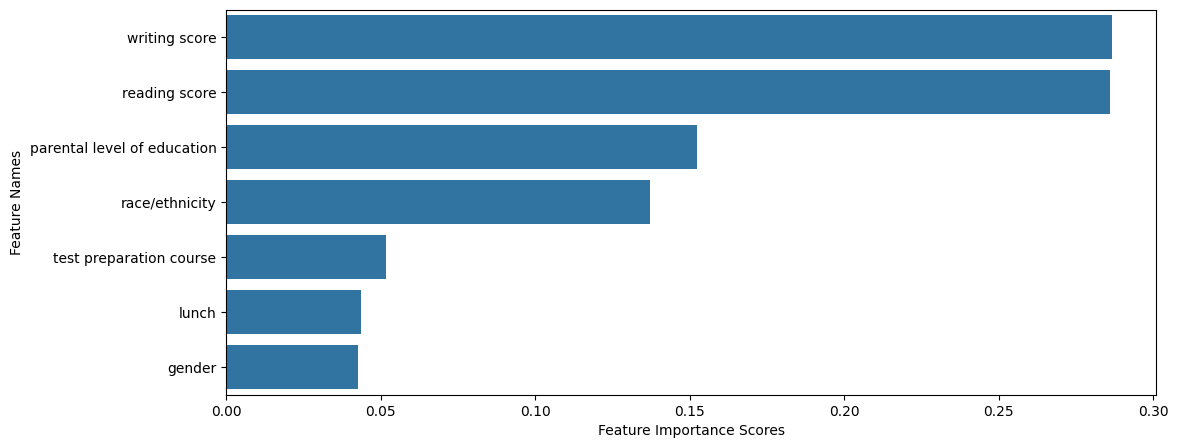

In [257]:
import seaborn as sns
plt.figure(figsize = (12, 5))
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel("Feature Importance Scores")
plt.ylabel("Feature Names")
plt.show()